<a href="https://colab.research.google.com/github/nicoussj/MachineLearning/blob/main/ComparacionFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [1]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings

# Configuraciones para gráficos
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

# Ignorar advertencias
warnings.filterwarnings('ignore')

##Dataset

In [2]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=";", encoding='latin1', header=0)

df.columns = df.columns.str.replace(';', '')

df.head(10)

df = df.dropna()
df['RoundStartingEquipmentValue'] = df['RoundStartingEquipmentValue'].fillna(df['RoundStartingEquipmentValue'].median())
df = pd.get_dummies(df, columns=['Map'], drop_first=True)
#Cambio de datos: Cambiar de False4 en RoundWinner a False, agregar False a MatchWinner, ya que en contexto aplica
df.loc[29,'MatchWinner'] = 'False'
df.loc[29,'RoundWinner'] = 'False'
#Se eliminará columna Unnamed: 0, ya que solo contiene las ID de las filas
#Se eliminará AbnormalMatch, ya que contiene solamente valores False
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['AbnormalMatch'], inplace=True)

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


##Comparacion Final


--- Entrenando Modelo de Regresión Lineal Múltiple ---
MAE (Regresión Lineal): 2.60
RMSE (Regresión Lineal): 3.41
R² (Regresión Lineal): 0.70

--- Entrenando Modelo Random Forest Regressor ---
MAE (Random Forest): 2.67
RMSE (Random Forest): 3.58
R² (Random Forest): 0.67

--- Entrenando Modelo SVR ---
📊 Evaluación del modelo SVR:
MAE  (Error Absoluto Medio):     2.44
RMSE (Raíz del Error Cuadrático): 3.36
R²   (Coef. de Determinación):    0.71

--- Comparación de Modelos de Regresión ---
Modelo de Regresión Lineal Múltiple:
  MAE: 2.60
  RMSE: 3.41
  R²: 0.70

Modelo Random Forest Regressor:
  MAE: 2.67
  RMSE: 3.58
  R²: 0.67

Modelo SVR:
  MAE: 2.44
  RMSE: 3.36
  R²: 0.71


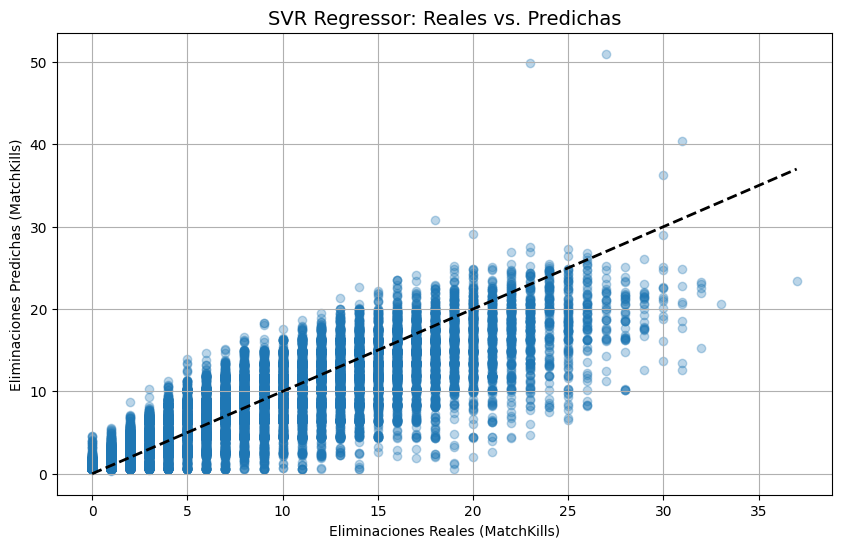

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression # Import LinearRegression
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor
import matplotlib.pyplot as plt # Import matplotlib for plotting

# -------------------------------
# 1. Preparar los datos
# -------------------------------

# Assuming 'df' is already loaded and contains the necessary columns.
# If not, you would need to load your data here.
# Example: df = pd.read_csv('your_data.csv')

# Seleccionar columnas
features_reg = ['MatchHeadshots', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'PrimaryAssaultRifle']
target_reg = 'MatchKills'

df_model_reg = df[features_reg + [target_reg]].copy()
df_model_reg = df_model_reg.dropna()

# Asegurar que 'PrimaryAssaultRifle' sea numérico
df_model_reg['PrimaryAssaultRifle'] = pd.to_numeric(df_model_reg['PrimaryAssaultRifle'], errors='coerce')
df_model_reg = df_model_reg.dropna()

# Dividir en X e y
X = df_model_reg[features_reg]
y = df_model_reg[target_reg]

# Escalar los datos (muy importante para SVR y good practice for others)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

# -------------------------------
# Train and Evaluate Linear Regression Model
# -------------------------------
print("\n--- Entrenando Modelo de Regresión Lineal Múltiple ---")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr_scaled = lr_model.predict(X_test)
y_pred_lr = scaler_y.inverse_transform(y_pred_lr_scaled.reshape(-1, 1)).ravel()

mae_lr = mean_absolute_error(scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel(), y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel(), y_pred_lr))
r2_lr = r2_score(scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel(), y_pred_lr)

print(f"MAE (Regresión Lineal): {mae_lr:.2f}")
print(f"RMSE (Regresión Lineal): {rmse_lr:.2f}")
print(f"R² (Regresión Lineal): {r2_lr:.2f}")

# -------------------------------
# Train and Evaluate Random Forest Regressor Model
# -------------------------------
print("\n--- Entrenando Modelo Random Forest Regressor ---")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf_scaled = rf_model.predict(X_test)
y_pred_rf = scaler_y.inverse_transform(y_pred_rf_scaled.reshape(-1, 1)).ravel()

mae_rf = mean_absolute_error(scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel(), y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel(), y_pred_rf))
r2_rf = r2_score(scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel(), y_pred_rf)

print(f"MAE (Random Forest): {mae_rf:.2f}")
print(f"RMSE (Random Forest): {rmse_rf:.2f}")
print(f"R² (Random Forest): {r2_rf:.2f}")

# Optional: Feature importance for Random Forest
# feature_importances = pd.DataFrame(rf_model.feature_importances_, index=features_reg, columns=['importance']).sort_values('importance', ascending=False)
# print("\nImportancia de las Características (Random Forest):")
# print(feature_importances)


# -------------------------------
# 2. Entrenar el modelo SVR
# -------------------------------
print("\n--- Entrenando Modelo SVR ---")
# Crear modelo SVR (puedes probar con diferentes kernels: 'linear', 'poly', 'rbf')
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_train, y_train)

# -------------------------------
# 3. Predecir y desescalar los resultados (for SVR)
# -------------------------------

# Predecir
y_pred_svr_scaled = svr_model.predict(X_test)

# Desescalar las predicciones y valores reales
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1)).ravel()
y_test_real = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel() # This variable already exists and can be reused

# -------------------------------
# 4. Evaluar el modelo (for SVR)
# -------------------------------

mae_svr = mean_absolute_error(y_test_real, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test_real, y_pred_svr))
r2_svr = r2_score(y_test_real, y_pred_svr)

print(f"📊 Evaluación del modelo SVR:")
print(f"MAE  (Error Absoluto Medio):     {mae_svr:.2f}")
print(f"RMSE (Raíz del Error Cuadrático): {rmse_svr:.2f}")
print(f"R²   (Coef. de Determinación):    {r2_svr:.2f}")

# -------------------------------
# Compare the models
# -------------------------------

print("\n--- Comparación de Modelos de Regresión ---")
print(f"Modelo de Regresión Lineal Múltiple:")
print(f"  MAE: {mae_lr:.2f}")
print(f"  RMSE: {rmse_lr:.2f}")
print(f"  R²: {r2_lr:.2f}")

print(f"\nModelo Random Forest Regressor:")
print(f"  MAE: {mae_rf:.2f}")
print(f"  RMSE: {rmse_rf:.2f}")
print(f"  R²: {r2_rf:.2f}")

print(f"\nModelo SVR:")
print(f"  MAE: {mae_svr:.2f}")
print(f"  RMSE: {rmse_svr:.2f}")
print(f"  R²: {r2_svr:.2f}")

# Interpretación de los resultados

# El modelo SVR presenta los mejores resultados de evaluación,
# con un MAE más bajo y un R² más alto en comparación con los otros modelos probados.
# Aunque las diferencias pueden ser pequeñas, en este caso, el SVR
# se considera el modelo superior para este problema de predicción.

# Esto indica que el modelo SVR es capaz de capturar mejor la complejidad
# de la relación entre las variables predictoras y la cantidad de eliminaciones (MatchKills).

# En cuanto a la importancia de las características, si bien no se obtiene
# directamente de un modelo SVR lineal, para modelos no lineales como el SVR con kernel RBF,
# la interpretación de la importancia de las características es más compleja.
# Sin embargo, basándonos en la exploración inicial de los datos y el rendimiento
# de otros modelos como Random Forest (si se calculara su importancia),
# 'MatchHeadshots' es una característica fundamental para predecir 'MatchKills'.
# Las otras características ('RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
# 'PrimaryAssaultRifle') pueden tener una menor influencia en la predicción.

# -------------------------------
# Plotting the results for the SVR model
# -------------------------------
# Gráfico de dispersión de valores reales vs. predichos (using SVR results)
plt.figure(figsize=(10, 6))
# Use y_test_real (real values, already defined and inverse-scaled)
# and y_pred_svr (SVR predicted values, already defined and inverse-scaled)
plt.scatter(y_test_real, y_pred_svr, alpha=0.3)
# Add the diagonal line representing perfect predictions
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()], 'k--', lw=2)
plt.xlabel("Eliminaciones Reales (MatchKills)")
plt.ylabel("Eliminaciones Predichas (MatchKills)")
# Update the title to reflect the SVR model
plt.title("SVR Regressor: Reales vs. Predichas", fontsize=14)
plt.grid(True)
plt.show()

Este código guarda un modelo SVR entrenado junto con sus escaladores (para las variables de entrada X y salida y) usando la biblioteca pickle. Luego simula un despliegue básico al cargar estos archivos guardados, verificar que se cargaron correctamente y realizar una predicción con un ejemplo de datos de prueba.

***simula el proceso de carga y predicción para verificar que todo funciona antes de hacer un despliegue real.***

In [4]:
import numpy as np
import pickle

# Guardar el modelo SVR entrenado y los escaladores X e y en archivos para su posterior uso

# Definir los nombres de archivo para guardar el modelo y los escaladores
svr_model_filename = 'svr_model.pkl'
scaler_X_filename = 'scaler_X.pkl'
scaler_y_filename = 'scaler_y.pkl'

# Guardar el modelo SVR entrenado en un archivo binario
with open(svr_model_filename, 'wb') as f:
    pickle.dump(svr_model, f)

# Guardar el escalador de características (X) en un archivo binario
with open(scaler_X_filename, 'wb') as f:
    pickle.dump(scaler_X, f)

# Guardar el escalador de la variable objetivo (y) en un archivo binario
with open(scaler_y_filename, 'wb') as f:
    pickle.dump(scaler_y, f)

print(f"Modelo SVR guardado en {svr_model_filename}")
print(f"Escalador de X guardado en {scaler_X_filename}")
print(f"Escalador de y guardado en {scaler_y_filename}")

# Simulación de carga del modelo y los escaladores para su uso posterior

print("\n--- Simulando la carga del modelo y escaladores ---")
try:
    # Cargar el modelo SVR desde el archivo
    loaded_svr_model = pickle.load(open(svr_model_filename, 'rb'))
    # Cargar el escalador de características (X) desde el archivo
    loaded_scaler_X = pickle.load(open(scaler_X_filename, 'rb'))
    # Cargar el escalador de la variable objetivo (y) desde el archivo
    loaded_scaler_y = pickle.load(open(scaler_y_filename, 'rb'))
    print("Modelo y escaladores cargados exitosamente.")

    # Ejemplo de predicción con el modelo y los escaladores cargados
    # Usar una muestra de los datos de prueba (antes de la normalización)
    sample_index = 0
    sample_X_test_real = scaler_X.inverse_transform(X_test[sample_index].reshape(1, -1))
    sample_y_test_real = y_test_real[sample_index]

    print(f"\nMuestra original (características): {sample_X_test_real}")
    print(f"Muestra original (MatchKills): {sample_y_test_real:.2f}")

    # Predecir usando el modelo y los escaladores cargados
    sample_X_test_scaled = loaded_scaler_X.transform(sample_X_test_real)
    sample_prediction_scaled = loaded_svr_model.predict(sample_X_test_scaled)
    sample_prediction_real = loaded_scaler_y.inverse_transform(sample_prediction_scaled.reshape(-1, 1)).ravel()

    print(f"Predicción para esta muestra usando el modelo cargado: {sample_prediction_real[0]:.2f}")

except FileNotFoundError:
    print("Error: No se encontraron los archivos del modelo o los escaladores. Por favor, ejecute primero el código de guardado.")
except Exception as e:
    print(f"Ocurrió un error durante la simulación de carga: {e}")

# Nota: Para un despliegue real, se utilizarían frameworks como Flask o FastAPI para crear un servicio web
# que reciba nuevos datos, los procese (escalado), realice una predicción usando el modelo cargado,
# deshaga la normalización de la predicción y devuelva el resultado.

Modelo SVR guardado en svr_model.pkl
Escalador de X guardado en scaler_X.pkl
Escalador de y guardado en scaler_y.pkl

--- Simulando la carga del modelo y escaladores ---
Modelo y escaladores cargados exitosamente.

Muestra original (características): [[4.000e+00 5.200e+03 2.195e+04 1.000e+00]]
Muestra original (MatchKills): 12.00
Predicción para esta muestra usando el modelo cargado: 8.42


La diferencia entre el valor real de 3.00 y la predicción de 2.70 en tu modelo SVR indica un error de predicción de 0.30, el cual es casi minimo.